In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer

In [3]:
df = pd.read_csv("train.csv", usecols = ["Age","Fare","Survived"])

In [4]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [5]:
df.dropna(inplace=True)

In [6]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
885,0,39.0,29.1250
886,0,27.0,13.0000
887,1,19.0,30.0000
889,1,26.0,30.0000


In [7]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [9]:
clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.6223776223776224

In [11]:
cross_val_score(clf,X,y,scoring = "accuracy", cv = 10).mean()

0.6303208137715179

In [26]:
kbin_age = KBinsDiscretizer(n_bins=10,encode="ordinal",strategy="uniform")
kbin_fare = KBinsDiscretizer(n_bins=10,encode="ordinal",strategy="quantile")

In [27]:
trf = ColumnTransformer(([("age",kbin_age,[0]),("fare",kbin_fare,[1])]),remainder="passthrough")

In [28]:
X_train_transformed  = trf.fit_transform(X_train)

X_test_transformed = trf.transform(X_test)

In [29]:
trf.named_transformers_["age"].n_bins_

array([10])

In [30]:
X_train_transformed

array([[3., 5.],
       [3., 4.],
       [3., 5.],
       ...,
       [5., 9.],
       [4., 5.],
       [4., 2.]])

In [19]:
output = pd.DataFrame({"age":X_train["Age"],"age_trf":X_train_transformed[:,0],"fare":X_train["Fare"],"fare_trf":X_train_transformed[:,1]})

In [31]:
output

,age,age_trf,fare,fare_trf
328,31.0,1.0,20.5250,0.0
73,26.0,1.0,14.4542,0.0
253,30.0,1.0,16.1000,0.0
719,33.0,2.0,7.7750,0.0
666,25.0,1.0,13.0000,0.0
...,...,...,...,...
92,46.0,2.0,61.1750,0.0
134,25.0,1.0,13.0000,0.0
337,41.0,2.0,134.5000,1.0
548,33.0,2.0,20.5250,0.0


In [32]:
clf.fit(X_train_transformed,y_train)

y_pred1 = clf.predict(X_test_transformed)

accuracy_score(y_test,y_pred1)

0.6363636363636364

In [33]:
X_tran = trf.fit_transform(X)
cross_val_score(clf,X_tran,y,scoring = "accuracy", cv = 10).mean()

0.659839593114241

In [51]:
def discretizer(bins,encode,strategy):
    kbin_age1 = KBinsDiscretizer(n_bins=bins, encode=encode,strategy=strategy)
    kbin_fare1 = KBinsDiscretizer(n_bins=bins, encode=encode,strategy=strategy)
    
    trf1 = ColumnTransformer([("age",kbin_age1,[0]),("fare",kbin_fare1,[1])],remainder="passthrough")
    
    X_tran1 = trf1.fit_transform(X)
    
    clf1 = DecisionTreeClassifier()
    print(np.mean(cross_val_score(clf1,X_tran1,y,scoring = "accuracy",cv = 10)))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X["Age"])
    plt.title("Age Before")
    
    plt.subplot(122)
    plt.hist(X_tran1[:,0],color = "red")
    plt.title("Age After")
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X["Fare"])
    plt.title("Fare Before")
    
    plt.subplot(122)
    plt.hist(X_tran1[:,1],color = "red")
    plt.title("Fare After")
    
    
    plt.show()

0.662754303599374


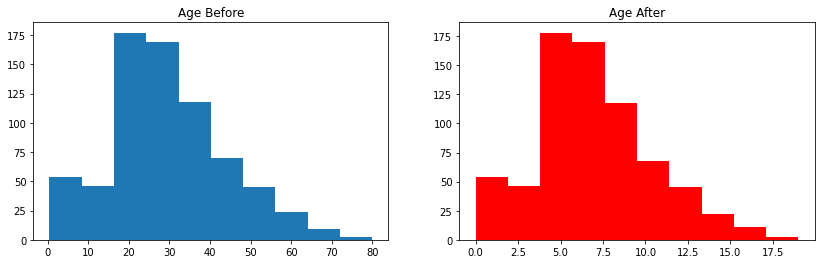

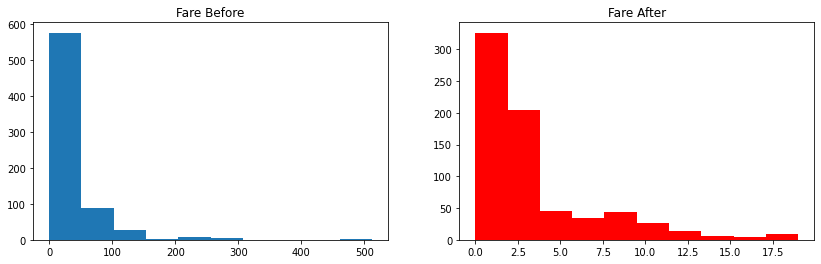

In [57]:
discretizer(20,"ordinal","kmeans")

In [40]:
X_tran

array([[2., 0.],
       [4., 8.],
       [3., 2.],
       ...,
       [2., 7.],
       [3., 7.],
       [3., 1.]])

# Binarisation Example

In [58]:
df1 = pd.read_csv("train.csv", usecols = ["Age","Fare","SibSp","Parch","Survived"])

In [59]:
df1

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500
...,...,...,...,...,...
886,0,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
888,0,NaN,1,2,23.4500
889,1,26.0,0,0,30.0000


In [60]:
df1.dropna(inplace=True)

In [61]:
df1["Family"] = df1["SibSp"]+df1["Parch"]

In [62]:
df1

,Survived,Age,SibSp,Parch,Fare,Family
0,0,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,1
2,1,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,1
4,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,5
886,0,27.0,0,0,13.0000,0
887,1,19.0,0,0,30.0000,0
889,1,26.0,0,0,30.0000,0


In [65]:
df1.drop(["SibSp","Parch"],axis = 1, inplace=True)

In [66]:
df1

,Survived,Age,Fare,Family
0,0,22.0,7.2500,1
1,1,38.0,71.2833,1
2,1,26.0,7.9250,0
3,1,35.0,53.1000,1
4,0,35.0,8.0500,0
...,...,...,...,...
885,0,39.0,29.1250,5
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
889,1,26.0,30.0000,0


In [68]:
X1= df1.iloc[:,1:]
y1 = df1.iloc[:,0]

In [69]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size=0.2,random_state=42)

In [71]:
clf2 = DecisionTreeClassifier()

clf2.fit(X_train1,y_train1)

y_pred2 = clf2.predict(X_test1)

accuracy_score(y_test1,y_pred2)

0.6293706293706294

In [72]:
from sklearn.preprocessing import Binarizer

In [79]:
trf3 = ColumnTransformer([("family",Binarizer(copy=False),[2])], remainder="passthrough")

In [80]:
X_train_tran = trf3.fit_transform(X_train1)
X_test_tran = trf3.transform(X_test1)

In [82]:
clf2.fit(X_train_tran,y_train)


y_pred3 = clf2.predict(X_test_tran)

accuracy_score(y_test1,y_pred3)


0.6223776223776224

In [84]:
X_trn1 = trf3.fit_transform(X)

In [85]:
np.mean(cross_val_score(clf2,X_trn1,y,scoring = "accuracy",cv = 10))

0.6290101721439749